# Clustering

**Bank Customer Segmentation**

Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.

**About this Dataset**

This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

**Interesting Analysis Ideas**

The dataset can be used for different analysis, example -


1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.


***K-means Using Tensorflow and Spectral Clustering using Scikit-Learn was implemented by Siddhant Sancheti (016710421)***

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.stats import probplot
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from datetime import date

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=8562d9141779330e37a7149e5851baec795f9d52db8db4ca45f569790b15ff15
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# Import dataset

In [ ]:
df = pd.read_csv('/content/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5


# Data Wrangling

In [ ]:
df.shape

(99451, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99451 entries, 0 to 99450
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            99451 non-null  object 
 1   CustomerID               99451 non-null  object 
 2   CustomerDOB              99075 non-null  object 
 3   CustGender               99359 non-null  object 
 4   CustLocation             99435 non-null  object 
 5   CustAccountBalance       99214 non-null  float64
 6   TransactionDate          99450 non-null  object 
 7   TransactionTime          99450 non-null  float64
 8   TransactionAmount (INR)  99450 non-null  float64
dtypes: float64(3), object(6)
memory usage: 6.8+ MB


In [ ]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,9.921400e+04,99450.000000,99450.000000
mean,1.160071e+05,159382.101126,1554.525303
std,7.718315e+05,49284.749749,6435.589572
min,0.000000e+00,1.000000,0.000000
25%,4.688500e+03,130607.250000,150.000000
50%,1.672947e+04,165307.000000,426.160000
75%,5.704145e+04,200402.750000,1135.000000
max,1.150355e+08,235955.000000,720001.160000


In [ ]:
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                376
CustGender                  92
CustLocation                16
CustAccountBalance         237
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      1
dtype: int64

In [ ]:
df[df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [ ]:

df.drop(['TransactionID','CustomerID'],axis=1,inplace=True)

In [ ]:
df['CustGender'].value_counts()

M    72213
F    27146
Name: CustGender, dtype: int64

In [ ]:
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

In [ ]:
df['CustGender'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
df = df[~df['CustomerDOB'].isna()]
df.CustomerDOB = pd.to_datetime(df.CustomerDOB,errors='coerce')

In [ ]:
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [ ]:
df['Age'] = df.CustomerDOB.apply(age)

In [ ]:
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)
df.shape

(91152, 7)

In [ ]:
for col in df.columns:
    print("Percentage of null values of {}:".format(col),str(np.round(df[col].isna().sum()/len(df)*100,2)) + '%')

Percentage of null values of CustGender: 0.08%
Percentage of null values of CustLocation: 0.02%
Percentage of null values of CustAccountBalance: 0.24%
Percentage of null values of TransactionDate: 0.0%
Percentage of null values of TransactionTime: 0.0%
Percentage of null values of TransactionAmount (INR): 0.0%
Percentage of null values of Age: 0.0%


In [ ]:
for col in df.columns:
    print("Percentage of unique values of {}:".format(col),str(np.round(df[col].nunique()/len(df)*100,2)) + '%')

Percentage of unique values of CustGender: 0.0%
Percentage of unique values of CustLocation: 4.21%
Percentage of unique values of CustAccountBalance: 54.0%
Percentage of unique values of TransactionDate: 0.04%
Percentage of unique values of TransactionTime: 51.38%
Percentage of unique values of TransactionAmount (INR): 16.05%
Percentage of unique values of Age: 0.05%


In [ ]:
df = df[~df['CustGender'].isna()]

In [ ]:
df = df[~df['CustLocation'].isna()]

In [ ]:
df.CustAccountBalance = df.CustAccountBalance.fillna(df.groupby('CustLocation')['CustAccountBalance'].transform('mean'))

In [ ]:
df = df[~df.CustAccountBalance.isna()]

In [ ]:
df.isna().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            1
TransactionTime            1
TransactionAmount (INR)    1
Age                        0
dtype: int64

In [ ]:
df.shape

(91047, 7)

In [ ]:
df.TransactionDate = pd.to_datetime(df.TransactionDate,errors='coerce')

In [ ]:
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [ ]:
df.drop('TransactionDate',axis=1,inplace=True)

Skewness of CustAccountBalance: 25.67458317414603
Kurtosis of CustAccountBalance: 958.1701144629103
Distribution Plot of CustAccountBalance:


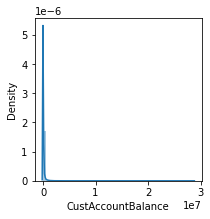

Box Plot of CustAccountBalance:


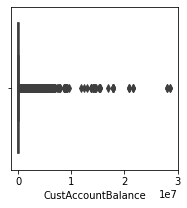

Quantile-Quantile Plot of CustAccountBalance:


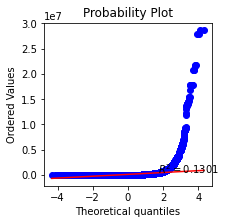

Skewness of TransactionTime: -0.8915655895488459
Kurtosis of TransactionTime: 0.5817671996326168
Distribution Plot of TransactionTime:


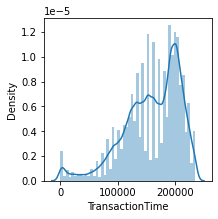

Box Plot of TransactionTime:


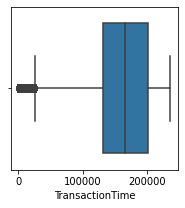

Quantile-Quantile Plot of TransactionTime:


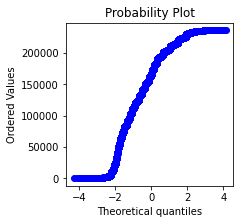

Skewness of TransactionAmount (INR): 36.81105259422241
Kurtosis of TransactionAmount (INR): 2986.6719969580495
Distribution Plot of TransactionAmount (INR):


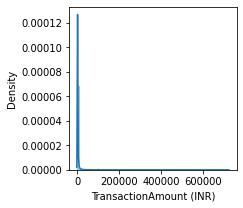

Box Plot of TransactionAmount (INR):


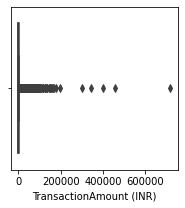

Quantile-Quantile Plot of TransactionAmount (INR):


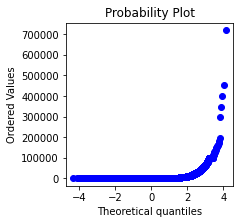

Skewness of TransactionMonth: 0.14122899760532806
Kurtosis of TransactionMonth: -1.854993067358674
Distribution Plot of TransactionMonth:


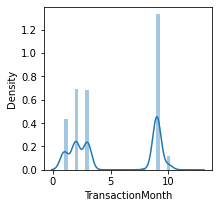

Box Plot of TransactionMonth:


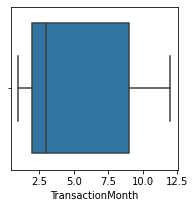

Quantile-Quantile Plot of TransactionMonth:


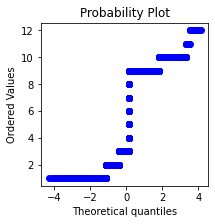

Skewness of TransactionDay: 0.3146315994683215
Kurtosis of TransactionDay: -1.7844596163076873
Distribution Plot of TransactionDay:


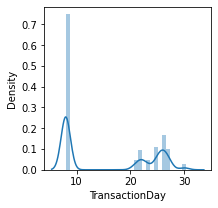

Box Plot of TransactionDay:


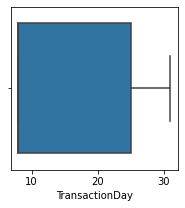

Quantile-Quantile Plot of TransactionDay:


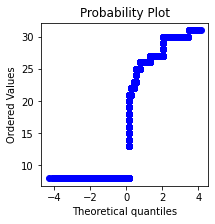

In [ ]:
for col in df.columns:
    if df[col].dtypes == np.float64:
        print("Skewness of {}:".format(col),df[col].skew())
        print("Kurtosis of {}:".format(col),df[col].kurt())
        plt.figure(figsize=(3,3))
        print("Distribution Plot of {}:".format(col))
        sns.distplot(df[col])
        plt.show()
        print("Box Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        sns.boxplot(df[col])
        plt.show()
        print("Quantile-Quantile Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        probplot(df[col],plot=plt,rvalue=True)
        plt.show()

#Exploratory Data Analysis

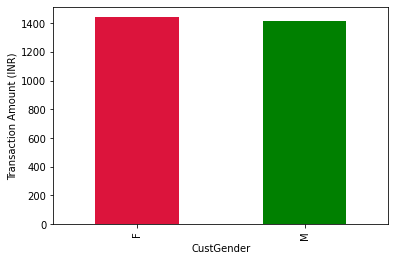

In [ ]:
ax = df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(kind='bar',color=['crimson','green'])
plt.ylabel('Transaction Amount (INR)');

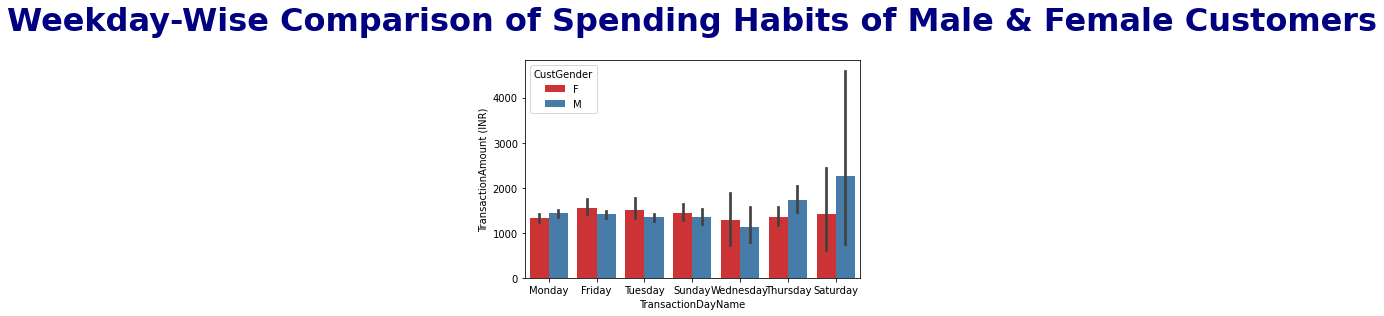

In [ ]:
sns.barplot(data=df,x='TransactionDayName',y='TransactionAmount (INR)',palette='Set1',hue='CustGender')
plt.title('Weekday-Wise Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

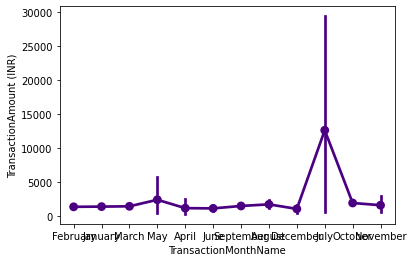

In [ ]:
sns.pointplot(data=df,x='TransactionMonthName',y='TransactionAmount (INR)',color='indigo')

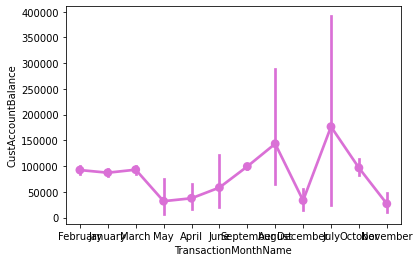

In [ ]:
sns.pointplot(data=df,x='TransactionMonthName',y='CustAccountBalance',color='orchid')

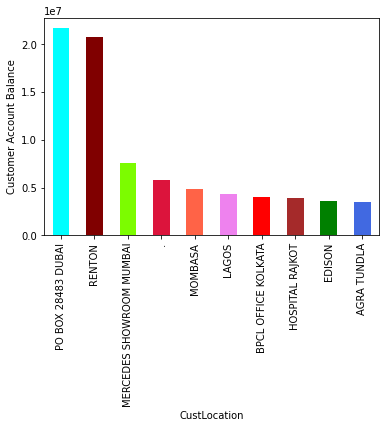

In [ ]:
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['aqua','maroon','lawngreen','crimson','tomato','violet','red','brown','green','royalblue'])
plt.ylabel('Customer Account Balance');

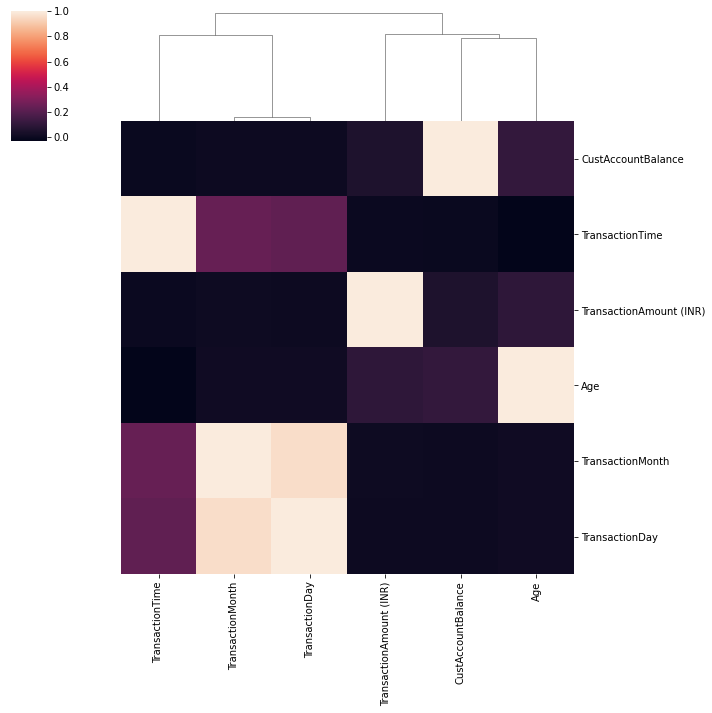

In [ ]:
sns.clustermap(df.corr(),row_cluster=False)

In [ ]:
df.CustGender.replace(['F','M'],[0,1],inplace=True)
df.CustGender = df.CustGender.astype(np.int64)

# Categorical Encoding

In [ ]:
encoder = LabelEncoder()
df.CustLocation = encoder.fit_transform(df.CustLocation)
df.CustLocation = df.CustLocation.astype(np.int64)

In [ ]:
df.drop(['TransactionMonthName','TransactionDayName'],axis=1,inplace=True)

# Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,TransactionDay
0,-1.633581,-0.226510,-0.151084,-0.330547,-0.229896,-0.415125,-0.924286,-0.881514
1,-1.633581,0.482256,-0.150975,-0.340543,-0.158551,-0.458060,-0.924286,-0.881514
2,-1.633581,0.482256,1.513613,-0.340503,0.104637,0.035693,-0.924286,-0.881514
3,-1.633581,0.647325,-0.172865,0.435769,0.055731,-0.286320,-0.924286,-0.881514
4,-1.633581,0.482256,-0.184126,0.287348,-0.140961,-0.350722,-0.924286,-0.881514


# PCA

In [ ]:
temp = scaled_df.sample(10000)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(temp)
pca_components = pd.DataFrame(pca_components,columns=['PC1','PC2'])
pca_components.head()

,PC1,PC2
0,-1.381047,0.485216
1,-1.213843,-0.227174
2,1.462603,-0.511028
3,-0.751278,-0.433694
4,-0.742805,-0.254464


# Spectral Clustering

In [ ]:
base_spectral = SpectralClustering(random_state=101)

In [ ]:
base_spectral.fit(pca_components)

SpectralClustering(random_state=101)

In [ ]:
print("Estimated number of clusters:",len(set(base_spectral.labels_)))
print("Clusters:",set(base_spectral.labels_))

Estimated number of clusters: 8
Clusters: {0, 1, 2, 3, 4, 5, 6, 7}


In [ ]:
pca_components['Cluster'] = base_spectral.labels_
print("Silhouette Score:",str(np.round(silhouette_score(pca_components,pca_components.Cluster)*100,2)) + '%')

Silhouette Score: 81.77%


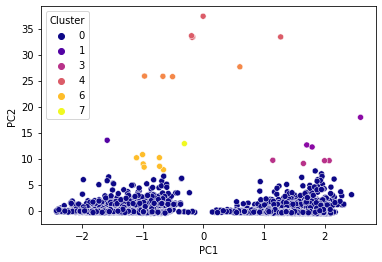

In [ ]:
sns.scatterplot(pca_components['PC1'],pca_components['PC2'],hue=pca_components['Cluster'],palette='plasma')

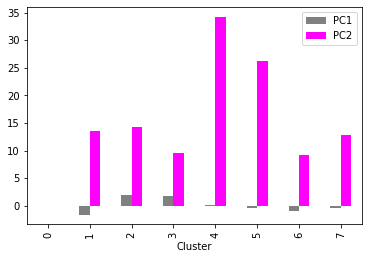

In [ ]:
pca_components.groupby('Cluster')[['PC1','PC2']].mean().plot(kind='bar',color=['grey','magenta'])

In [ ]:
temp = scaled_df.sample(n=10000)

In [ ]:
base_spectral = SpectralClustering(random_state=101)
base_spectral.fit(temp)

SpectralClustering(random_state=101)

In [ ]:
print("Estimated number of clusters:",set(base_spectral.labels_))

Estimated number of clusters: {0, 1, 2, 3, 4, 5, 6}


In [ ]:
print("Estimated number of noise points:",list(base_spectral.labels_).count(-1))

Estimated number of noise points: 0


In [ ]:
print("Silhouette Score:",str(np.round(silhouette_score(temp,base_spectral.labels_)*100,2)) + '%')

Silhouette Score: 63.71%


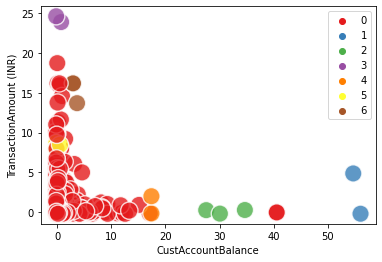

In [ ]:
sns.scatterplot(data=temp,x='CustAccountBalance',y='TransactionAmount (INR)',hue=base_spectral.labels_,s=300,alpha=0.8,palette='Set1')